In [1]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [2]:
# Read the data
data = pd.read_csv(r"C:\Users\nitisha.reddy\Documents\Intellipaat\Datasets\Flight Fare Prediction\Data_Train.csv")

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
from datetime import datetime as dt

In [6]:
data['Date_of_Journey'].shape

(10683,)

In [7]:
# Formatting the date
for i in range(10683):
    data.iloc[i,1] = dt.strptime(data.iloc[i,1], '%d/%m/%Y').strftime('%Y-%m-%d')


In [8]:
data.iloc[:,1]

0        2019-03-24
1        2019-05-01
2        2019-06-09
3        2019-05-12
4        2019-03-01
            ...    
10678    2019-04-09
10679    2019-04-27
10680    2019-04-27
10681    2019-03-01
10682    2019-05-09
Name: Date_of_Journey, Length: 10683, dtype: object

In [9]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])

In [10]:
data['month'] = data['Date_of_Journey'].dt.month

In [11]:
data['day'] = data['Date_of_Journey'].dt.day

In [12]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [13]:
data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [14]:
data['Duration'].shape

(10683,)

In [15]:
data['Duration'].isnull().sum()

0

In [16]:
duration = list(data['Duration'])

In [17]:
len(duration)

10683

In [18]:
# Separation of hrs and min from duration
duration_hrs=[]
duration_min=[]
for i in range(10683):
    if 'h' in duration[i]:
        x=duration[i].split('h')
        duration_hrs.append(x[0])
        if x[1]=='':
            duration_min.append(0)
        else:
            y=x[1].split('m')
            duration_min.append(y[0])
    else:
        x=duration[i].split('m')
        duration_min.append(x[0])
        duration_hrs.append(0)
 

In [19]:
len(duration_min)

10683

In [22]:
duration_min

[' 50',
 ' 25',
 0,
 ' 25',
 ' 45',
 ' 25',
 ' 30',
 ' 5',
 ' 30',
 ' 50',
 ' 15',
 ' 35',
 ' 15',
 ' 10',
 ' 35',
 ' 35',
 ' 30',
 ' 35',
 0,
 ' 35',
 ' 10',
 ' 20',
 ' 50',
 ' 55',
 ' 20',
 ' 10',
 ' 45',
 ' 55',
 ' 50',
 ' 15',
 ' 15',
 ' 25',
 ' 50',
 0,
 ' 30',
 ' 25',
 ' 15',
 ' 30',
 ' 15',
 ' 55',
 ' 5',
 ' 30',
 ' 5',
 ' 45',
 0,
 ' 50',
 ' 50',
 ' 15',
 ' 5',
 ' 55',
 ' 15',
 ' 20',
 ' 50',
 0,
 ' 50',
 ' 15',
 ' 5',
 ' 15',
 ' 30',
 ' 5',
 ' 25',
 ' 20',
 ' 15',
 ' 30',
 ' 15',
 ' 25',
 ' 50',
 ' 30',
 ' 20',
 ' 15',
 ' 25',
 ' 30',
 ' 20',
 ' 30',
 0,
 ' 45',
 ' 50',
 ' 30',
 ' 5',
 ' 15',
 ' 50',
 ' 40',
 ' 10',
 ' 35',
 0,
 ' 20',
 ' 25',
 ' 45',
 ' 20',
 0,
 ' 15',
 ' 5',
 ' 30',
 ' 20',
 ' 35',
 ' 25',
 ' 40',
 0,
 ' 25',
 ' 35',
 ' 20',
 ' 15',
 ' 30',
 0,
 ' 45',
 ' 55',
 ' 10',
 ' 30',
 ' 20',
 ' 55',
 0,
 ' 55',
 ' 45',
 ' 10',
 ' 55',
 ' 25',
 ' 5',
 ' 10',
 ' 40',
 ' 55',
 ' 40',
 ' 25',
 ' 5',
 ' 15',
 ' 25',
 ' 10',
 ' 10',
 0,
 ' 50',
 ' 20',
 0,
 ' 55',
 ' 10'

In [23]:
len(duration_hrs)

10683

In [24]:
data['duration_hrs']=duration_hrs
data['duration_min']=duration_min

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       10683 non-null  object
 1   Source        10683 non-null  object
 2   Destination   10683 non-null  object
 3   Dep_Time      10683 non-null  object
 4   Arrival_Time  10683 non-null  object
 5   Duration      10683 non-null  object
 6   Total_Stops   10682 non-null  object
 7   Price         10683 non-null  int64 
 8   month         10683 non-null  int64 
 9   day           10683 non-null  int64 
 10  duration_hrs  10683 non-null  object
 11  duration_min  10683 non-null  object
dtypes: int64(3), object(9)
memory usage: 1001.7+ KB


In [26]:
# converting to int
data['duration_hrs'] = data['duration_hrs'].astype('int')

In [27]:
# converting to int
data['duration_min'] = data['duration_min'].astype('int')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       10683 non-null  object
 1   Source        10683 non-null  object
 2   Destination   10683 non-null  object
 3   Dep_Time      10683 non-null  object
 4   Arrival_Time  10683 non-null  object
 5   Duration      10683 non-null  object
 6   Total_Stops   10682 non-null  object
 7   Price         10683 non-null  int64 
 8   month         10683 non-null  int64 
 9   day           10683 non-null  int64 
 10  duration_hrs  10683 non-null  int32 
 11  duration_min  10683 non-null  int32 
dtypes: int32(2), int64(3), object(7)
memory usage: 918.2+ KB


In [29]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Price', 'month', 'day', 'duration_hrs',
       'duration_min'],
      dtype='object')

In [30]:
# Time formatting
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'],format='%H:%M')

In [31]:
# hours extraction
data['Dep_hrs'] = pd.to_datetime(data['Dep_Time'],format='%H:%M').dt.hour

In [32]:
data['Dep_hrs']

0        22
1         5
2         9
3        18
4        16
         ..
10678    19
10679    20
10680     8
10681    11
10682    10
Name: Dep_hrs, Length: 10683, dtype: int64

In [33]:
# min extraction
data['Dep_min'] = pd.to_datetime(data['Dep_Time'],format='%H:%M').dt.minute

In [34]:
data['Dep_min']

0        20
1        50
2        25
3         5
4        50
         ..
10678    55
10679    45
10680    20
10681    30
10682    55
Name: Dep_min, Length: 10683, dtype: int64

In [35]:
data['Arrival_Time']

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [36]:
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])

In [37]:
# Arrival Hour extraction
data['Arrival_hr'] = data['Arrival_Time'].dt.hour

In [38]:
data['Arrival_hr']

0         1
1        13
2         4
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_hr, Length: 10683, dtype: int64

In [39]:
# Arrival minutes extraction
data['Arrival_min'] = data['Arrival_Time'].dt.minute

In [40]:
data['Arrival_min'] 

0        10
1        15
2        25
3        30
4        35
         ..
10678    25
10679    20
10680    20
10681    10
10682    15
Name: Arrival_min, Length: 10683, dtype: int64

In [41]:
# dropping departure time & arrival time
data.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [42]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'month', 'day', 'duration_hrs', 'duration_min', 'Dep_hrs', 'Dep_min',
       'Arrival_hr', 'Arrival_min'],
      dtype='object')

In [43]:
# dropping duration
data.drop('Duration',axis=1,inplace=True)

In [44]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'month',
       'day', 'duration_hrs', 'duration_min', 'Dep_hrs', 'Dep_min',
       'Arrival_hr', 'Arrival_min'],
      dtype='object')

In [45]:
data['Airline'].nunique()

12

In [46]:
# One hot encoding of categorical data
airline = pd.get_dummies(data['Airline'])

In [47]:
airline

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,0,0
10679,0,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,1,0


In [48]:
data['Source'].nunique()

5

In [49]:
# One hot encoding of categorical data
source = pd.get_dummies(data['Source'])

In [50]:
source

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


In [51]:
data['Destination'].nunique()

6

In [52]:
# One hot encoding of categorical data
destination = pd.get_dummies(data['Destination'])

In [53]:
destination

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
10678,1,0,0,0,0,0
10679,1,0,0,0,0,0
10680,0,0,1,0,0,0
10681,0,0,0,0,0,1


In [54]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [55]:
data.isnull().sum()

Airline         0
Source          0
Destination     0
Total_Stops     1
Price           0
month           0
day             0
duration_hrs    0
duration_min    0
Dep_hrs         0
Dep_min         0
Arrival_hr      0
Arrival_min     0
dtype: int64

In [56]:
data.dropna(axis=0,inplace = True)

In [57]:
# Label encoding of categorical data since it ordinal data
data['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [58]:
data['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [59]:
# Dropping categorical columns
data.drop(['Destination','Source','Airline'],axis=1,inplace=True)

In [60]:
data.columns

Index(['Total_Stops', 'Price', 'month', 'day', 'duration_hrs', 'duration_min',
       'Dep_hrs', 'Dep_min', 'Arrival_hr', 'Arrival_min'],
      dtype='object')

In [61]:
# Concatenation after encoding categorical variables
data = pd.concat([data,destination,source,airline],axis=1)

In [62]:
data

,Total_Stops,Price,month,day,duration_hrs,duration_min,Dep_hrs,Dep_min,Arrival_hr,Arrival_min,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0.0,3897.0,3.0,24.0,2.0,50.0,22.0,20.0,1.0,10.0,...,0,1,0,0,0,0,0,0,0,0
1,2.0,7662.0,5.0,1.0,7.0,25.0,5.0,50.0,13.0,15.0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,13882.0,6.0,9.0,19.0,0.0,9.0,25.0,4.0,25.0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,6218.0,5.0,12.0,5.0,25.0,18.0,5.0,23.0,30.0,...,0,1,0,0,0,0,0,0,0,0
4,1.0,13302.0,3.0,1.0,4.0,45.0,16.0,50.0,21.0,35.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107.0,4.0,9.0,2.0,30.0,19.0,55.0,22.0,25.0,...,0,0,0,0,0,0,0,0,0,0
10679,0.0,4145.0,4.0,27.0,2.0,35.0,20.0,45.0,23.0,20.0,...,0,0,0,0,0,0,0,0,0,0
10680,0.0,7229.0,4.0,27.0,3.0,0.0,8.0,20.0,11.0,20.0,...,0,0,1,0,0,0,0,0,0,0
10681,0.0,12648.0,3.0,1.0,2.0,40.0,11.0,30.0,14.0,10.0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
data.columns

Index(['Total_Stops', 'Price', 'month', 'day', 'duration_hrs', 'duration_min',
       'Dep_hrs', 'Dep_min', 'Arrival_hr', 'Arrival_min', 'Banglore', 'Cochin',
       'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Banglore', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Air Asia', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy'],
      dtype='object')

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Stops                        10682 non-null  float64
 1   Price                              10682 non-null  float64
 2   month                              10682 non-null  float64
 3   day                                10682 non-null  float64
 4   duration_hrs                       10682 non-null  float64
 5   duration_min                       10682 non-null  float64
 6   Dep_hrs                            10682 non-null  float64
 7   Dep_min                            10682 non-null  float64
 8   Arrival_hr                         10682 non-null  float64
 9   Arrival_min                        10682 non-null  float64
 10  Banglore                           10683 non-null  uint8  
 11  Cochin                             10683 non-null  uin

In [65]:
data.dropna(axis=0,inplace=True)

In [66]:
data.isnull().sum()

Total_Stops                          0
Price                                0
month                                0
day                                  0
duration_hrs                         0
duration_min                         0
Dep_hrs                              0
Dep_min                              0
Arrival_hr                           0
Arrival_min                          0
Banglore                             0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                            0
Banglore                             0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Air Asia                             0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways              

In [67]:
y = data.loc[:,'Price']
X= data.drop('Price',axis=1)

In [68]:
X.isnull().sum()

Total_Stops                          0
month                                0
day                                  0
duration_hrs                         0
duration_min                         0
Dep_hrs                              0
Dep_min                              0
Arrival_hr                           0
Arrival_min                          0
Banglore                             0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                            0
Banglore                             0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Air Asia                             0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business     

In [69]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

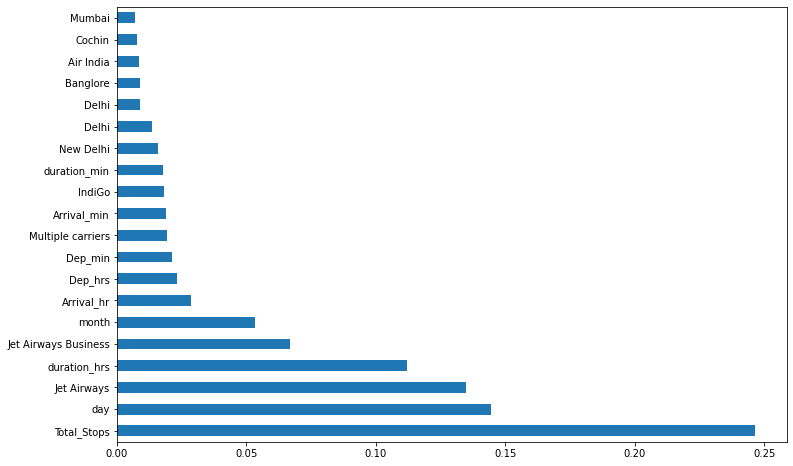

In [70]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [71]:
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [72]:
# Fitting the model
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [124]:
reg_rf.score(X_test,y_test)

0.7970012692094349

In [126]:
y_pred = reg_rf.predict(X_test)

In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [127]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [128]:
print(MAE , MSE, RMSE)

1174.739627436451 4377070.0670395205 2092.14484848433


In [130]:
r2_score(y_test,y_pred)

0.7970012692094349

In [99]:
# Test dataset
test = pd.read_csv(r"C:\Users\nitisha.reddy\Documents\Intellipaat\Datasets\Flight Fare Prediction\Test_set.csv")

In [100]:
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [101]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [102]:
test['Date_of_Journey']

0        6/06/2019
1       12/05/2019
2       21/05/2019
3       21/05/2019
4       24/06/2019
           ...    
2666     6/06/2019
2667    27/03/2019
2668     6/03/2019
2669     6/03/2019
2670    15/06/2019
Name: Date_of_Journey, Length: 2671, dtype: object

In [103]:
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [104]:
test['Date_of_Journey'].shape[0]

2671

In [105]:
#Test_dataset_preprocessing
for i in range(test['Date_of_Journey'].shape[0]):
    test.iloc[i,1] = dt.strptime(test.iloc[i,1], '%d/%m/%Y').strftime('%Y-%m-%d')

test['Date_of_Journey'] = pd.to_datetime(test['Date_of_Journey'])
test['month'] = test['Date_of_Journey'].dt.month
test['day'] = test['Date_of_Journey'].dt.day
test.drop('Date_of_Journey',axis=1,inplace=True)
test.drop(['Route','Additional_Info'],axis=1,inplace=True)
duration = list(test['Duration'])
duration_hrs=[]
duration_min=[]
for i in range(2671):
    if 'h' in duration[i]:
        x=duration[i].split('h')
        duration_hrs.append(x[0])
        if x[1]=='':
            duration_min.append(0)
        else:
            y=x[1].split('m')
            duration_min.append(y[0])
    else:
        x=duration[i].split('m')
        duration_min.append(x[0])
        duration_hrs.append(0)

        
test['duration_hrs']=duration_hrs
test['duration_min']=duration_min
test['duration_hrs'] = test['duration_hrs'].astype('int')
test['duration_min'] = test['duration_min'].astype('int')
test['Dep_Time'] = pd.to_datetime(test['Dep_Time'],format='%H:%M')
test['Dep_hrs'] = pd.to_datetime(test['Dep_Time'],format='%H:%M').dt.hour
test['Dep_min'] = pd.to_datetime(test['Dep_Time'],format='%H:%M').dt.minute
test['Arrival_Time'] = pd.to_datetime(test['Arrival_Time'])
test['Arrival_hr'] = test['Arrival_Time'].dt.hour
test['Arrival_min'] = test['Arrival_Time'].dt.minute
test.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)
test.drop('Duration',axis=1,inplace=True)
airline = pd.get_dummies(test['Airline'])
source = pd.get_dummies(test['Source'])
destination = pd.get_dummies(test['Destination'])
test['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
test.drop(['Destination','Source','Airline'],axis=1,inplace=True)
test = pd.concat([test,destination,source,airline],axis=1)

In [109]:
airline

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2666,0,1,0,0,0,0,0,0,0,0,0
2667,0,0,0,1,0,0,0,0,0,0,0
2668,0,0,0,0,1,0,0,0,0,0,0
2669,0,1,0,0,0,0,0,0,0,0,0


In [106]:
test

,Total_Stops,month,day,duration_hrs,duration_min,Dep_hrs,Dep_min,Arrival_hr,Arrival_min,Banglore,...,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,1,6,6,10,55,17,30,4,25,0,...,0,0,0,1,0,0,0,0,0,0
1,1,5,12,4,0,6,20,10,20,1,...,0,0,1,0,0,0,0,0,0,0
2,1,5,21,23,45,19,15,19,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,5,21,13,0,8,0,21,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,6,24,2,50,23,55,2,45,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,23,55,20,30,20,25,1,...,1,0,0,0,0,0,0,0,0,0
2667,0,3,27,2,35,14,20,16,55,1,...,0,0,1,0,0,0,0,0,0,0
2668,1,3,6,6,35,21,50,4,25,0,...,0,0,0,1,0,0,0,0,0,0
2669,1,3,6,15,15,4,0,19,15,0,...,1,0,0,0,0,0,0,0,0,0


In [108]:
test.columns

Index(['Total_Stops', 'month', 'day', 'duration_hrs', 'duration_min',
       'Dep_hrs', 'Dep_min', 'Arrival_hr', 'Arrival_min', 'Banglore', 'Cochin',
       'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Banglore', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Air Asia', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy'],
      dtype='object')

In [121]:
# Inserting Truejet column since it is missing in airline category in test dataset
test.insert(29,'Trujet',np.zeros([2671,1]),allow_duplicates=True)

In [122]:
test.columns

Index(['Total_Stops', 'month', 'day', 'duration_hrs', 'duration_min',
       'Dep_hrs', 'Dep_min', 'Arrival_hr', 'Arrival_min', 'Banglore', 'Cochin',
       'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Banglore', 'Chennai',
       'Delhi', 'Kolkata', 'Mumbai', 'Air Asia', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy'],
      dtype='object')

In [123]:
ypred = reg_rf.predict(test)

In [131]:
# For fine tuning of model
from sklearn.model_selection import RandomizedSearchCV

In [132]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [133]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [135]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2)

In [142]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  10.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  11.3s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  10.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  18.1s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  13.5s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=10, total=  12.7s
[CV] n_estimators=600, min_samples_split=10

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 14.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [143]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [144]:
prediction = rf_random.predict(X_test)

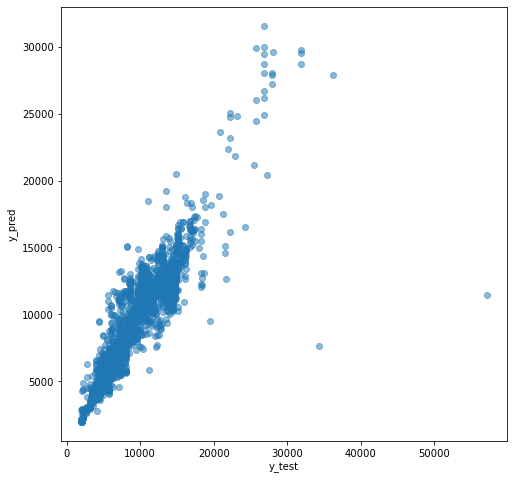

In [145]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [146]:
MAE1 = mean_absolute_error(y_test,prediction)
MSE1 = mean_squared_error(y_test,prediction)
RMSE1 = np.sqrt(MSE1)

In [147]:
print(MAE1,MSE1,RMSE1)

1143.7437107015203 4020642.5644274135 2005.1540001773963


In [154]:
# Model with best params obtained from RandomizedSearchCv
model_final = RandomForestRegressor(n_estimators= 1000,min_samples_split= 10,min_samples_leaf =  2,max_features= 'auto',max_depth= 20)
                  

In [155]:
model_final.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=1000)

In [160]:
prediction_final = model_final.predict(X_test)

In [161]:
MAE2 = mean_absolute_error(y_test,prediction_final)
MSE2 = mean_squared_error(y_test,prediction_final)
RMSE2 = np.sqrt(MSE2)

In [162]:
print(MAE2,MSE2,RMSE2)

1146.5280838381448 4030684.489314331 2007.6564669570168


In [148]:
import pickle

In [159]:
# Saving the model for future use
pickle.dump(model_final,open('flight_fare.pkl','wb'))